## Set-up

In [1]:
#importing the boyz

import numpy as np
import pandas as pd
import statistics as sta
from PIL import Image
import requests as req

In [2]:
#importing credit data for real testing
credit = pd.read_csv('https://raw.githubusercontent.com/kg93999/Capstone/master/cs-test.csv',
                     index_col = 0)
credit.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Averages

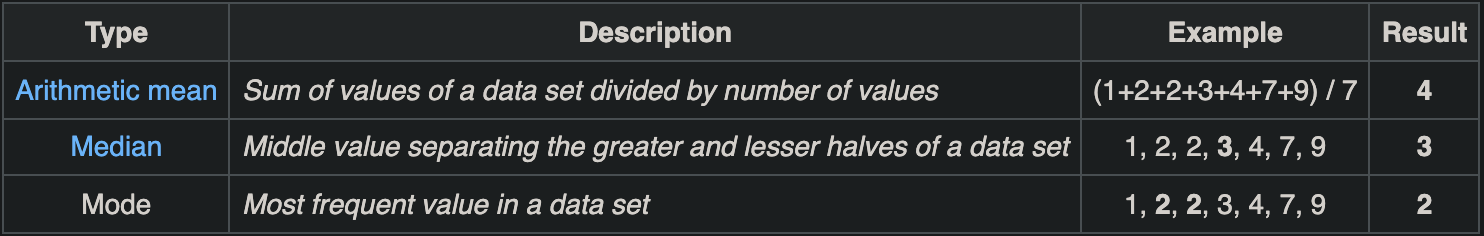

In [3]:
Image.open('mean_mode_median_explanation.png')

#source: https://en.wikipedia.org/wiki/Mode_(statistics)

In [25]:
#creating the averages class

class raw_avgs:
    
    #mode
    def mode(num_list):
        
        frequencies = [] #empty list to store frequencies
        unique_list = list(set(num_list)) #getting list of unique elemnts
        #getting list of frequency of occurrance of each element
        for element in unique_list:
            frequencies.append(num_list.count(element))

        test_dic = dict(zip(unique_list, frequencies)) #making a dictionary
        mode_list = [k for k,v in test_dic.items() if v == max(test_dic.values())] #getting max

        return mode_list
    
    #median
    def median(num_list):
        #sorting the list to find middle value
        num_list = sorted(list(num_list))
        # get index len(test_list)/2 if odd number, divide middle two if even
        if len(num_list) % 2 > 0:
            med_val = num_list[int((len(num_list)+1)/2)-1]
        else:
            med_val = (num_list[int(len(num_list)/2)-1] + num_list[int((len(num_list)+2)/2)-1]) / 2

        return float(med_val)
    
    #mean
    def mean(num_list):
        #calculating mean and rounding
        mean_val = sum(num_list) / len(num_list)
        
        return mean_val

### Mode

Mode is the most frequent value in the data set.

In [5]:
#unit testing

test_1 = [2, 3, 4]
test_2 = [2, 3, 4, 4, 5, 6, 6, 7]
test_3 = [2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5]

answer_1 = [2, 3, 4]
answer_2 = [4, 6]
answer_3 = [3]

print("Unit test 1 pass: " + str(raw_avgs.mode(test_1) == answer_1))
print("Unit test 2 pass: " + str(raw_avgs.mode(test_2) == answer_2))
print("Unit test 3 pass: " + str(raw_avgs.mode(test_3) == answer_3))

Unit test 1 pass: True
Unit test 2 pass: True
Unit test 3 pass: True


In [6]:
#real testing vs. established function
credit.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
print("Real data established function test: " +\
      str([sta.mode(credit.age)] == raw_avgs.mode(list(credit.age))))

Real data established function test: True


### Median

Median is the 'middle' in the data set. The median is found by ordering the list and selecting the number that has an equal number of numbers above it and below it in the ordered list. If there is an odd number of numbers, this middle number is the median.  If there is an even number of numbers add the two middles and divide by 2.  The result will be the median.

In [26]:
#unit testing

test_1 = [2, 3, 4]
test_2 = [2, 3, 7, 6, 5, 4]
test_3 = [1]

answer_1 = 3.0
answer_2 = 4.5
answer_3 = 1.0

print("Unit test 1 pass: " + str(raw_avgs.median(test_1) == answer_1))
print("Unit test 2 pass: " + str(raw_avgs.median(test_2) == answer_2))
print("Unit test 3 pass: " + str(raw_avgs.median(test_3) == answer_3))

Unit test 1 pass: True
Unit test 2 pass: True
Unit test 3 pass: True


In [27]:
print("Real data established function test: " +\
      str(float(sta.median(credit.age)) == raw_avgs.median(list(credit.age))))

Real data established function test: True


### Mean

Mean is the sum of the values divided by the total number of values.

In [54]:
#unit testing

test_1 = [2, 3, 4, 2, 8, 7, 3]
test_2 = [2, 3, 4, 5, 6, 7]
test_3 = [1]

answer_1 = 4.14
answer_2 = 4.50
answer_3 = 1.00

print("Unit test 1 pass: " + str(round(raw_avgs.mean(test_1), 2) == answer_1))
print("Unit test 2 pass: " + str(raw_avgs.mean(test_2) == answer_2))
print("Unit test 3 pass: " + str(raw_avgs.mean(test_3) == answer_3))

Unit test 1 pass: True
Unit test 2 pass: True
Unit test 3 pass: True


In [38]:
print("Real data established function test: " +\
      str(round(sta.mean(credit.DebtRatio), 2) == round(raw_avgs.mean(credit.DebtRatio), 2)))

Real data established function test: True


## All things variance

In [158]:
#creating the variance class
class variance:
    
    #variance
    def var(num_list):
        #converting to pd df
        num_list = pd.DataFrame(num_list)
        #checking for NAs
        if len(num_list) != len(num_list.dropna()):
            return float('nan')
        #getting the squared differce to mean and summing/n
        else:
            var_value = num_list.apply(lambda x: (x - raw_avgs.mean(num_list[num_list.columns[0]]\
                                       .to_list()))**2).sum()/len(num_list)
            return float(var_value)
    
    def std(num_list):
        

### Variance

Variance is a measure of to what extent the data...varies (around the mean).

Specifically it is defined by the below equation where:
- *Xi* is each observation
- $\mu$ is the mean (see above)
- *n* is the number of observations

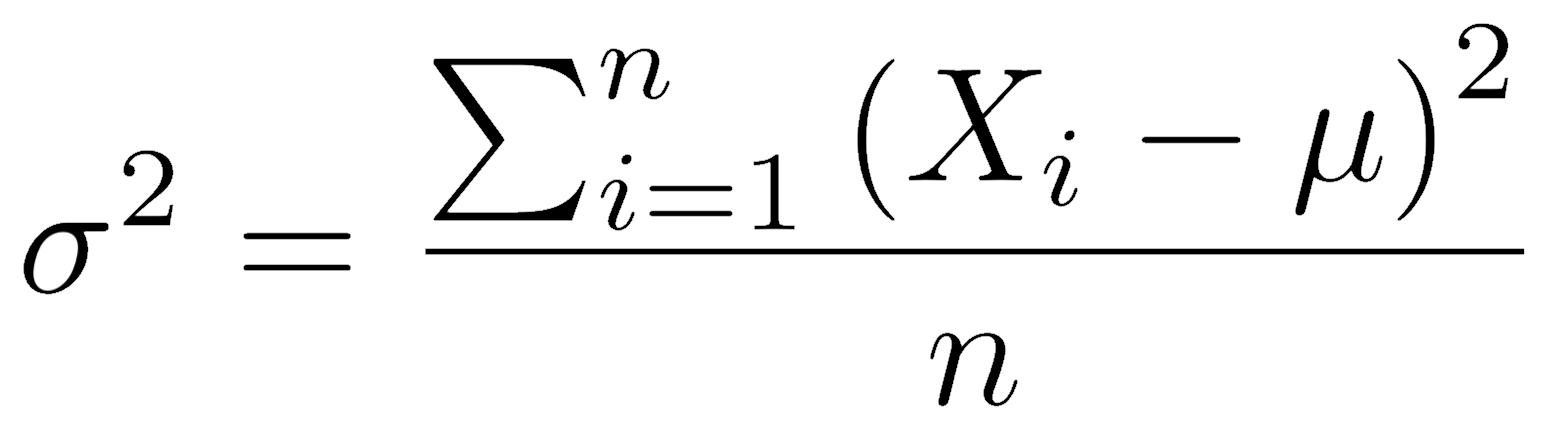

In [39]:
Image.open(req.get('http://strata.uga.edu/8370/lecturenotes/images/populationVariance.png',
                    stream = True).raw)

In [159]:
#unit testing

test_1 = [2, 3, 4]
test_2 = [1, 2, 3, 4]
test_3 = [1]

answer_1 = 0.67
answer_2 = 1.25
answer_3 = 0.00

print("Unit test 1 pass: " + str(round(variance.var(test_1), 2) == answer_1))
print("Unit test 2 pass: " + str(variance.var(test_2) == answer_2))
print("Unit test 3 pass: " + str(variance.var(test_3) == answer_3))

Unit test 1 pass: True
Unit test 2 pass: True
Unit test 3 pass: True


In [134]:
#checking dealing with NaNs
variance.var(credit.MonthlyIncome)

nan

In [166]:
print("Real data established function test: " +\
      str(round(sta.variance(credit.MonthlyIncome.dropna()), -6) == 
          round(variance.var(credit.MonthlyIncome.dropna()), -6)))

Real data established function test: True
